Note: This is not really a "network analysis" - we are only looking at the graph and seeing what cells are there. if you want to do more than just zoom in and look around at the cells in the graphs, I recommend using [Cytoscape](http://www.cytoscape.org/) for visualizing newtorks.

In [1]:
# Interactive jupyter widgets - use IntSlider directly for more control
from ipywidgets import IntSlider, interact

# Convert RGB colors to hex cor portability
from matplotlib.colors import rgb2hex

# Visualize networks
import networkx

# Numerical python
import numpy as np

# Pandas for dataframes
import pandas as pd

# K-nearest neighbors cell clustering from Dana Pe'er's lab
import phenograph

# Make color palettes
import seaborn as sns
%matplotlib inline

# Bokeh - interactive plotting in the browser
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.models.widgets import Panel, Tabs
from bokeh.layouts import widgetbox
from bokeh.io import output_notebook

# Local file: networkplots.py
import networkplots

# This line is required for the plots to appear in the notebooks
output_notebook()

Loading BokehJS ...

At this point, you can follow along with either the pre-baked Macosko2015 amacrine data, or you can load in your own expression matrices. For the best experience, make sure that the rows are cells and the columns are gene names.

In [2]:
import macosko2015
counts, cell_metadata, gene_metadata = macosko2015.load_big_clusters()
counts.head()

,2010107E04RIK,4930447C04RIK,A930011O12RIK,ABCA8A,ABLIM1,ACSL3,AIPL1,ALDOC,ANK3,APLP2,...,VEGFA,VIM,VSTM2B,VSX1,VSX2,WIPI1,YWHAB,ZBTB20,ZFP365,ZFP36L1
r1_TTCCTGCTAGGC,2,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
r1_TGGAGATACTCT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
r1_CGTCTACATCCG,2,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
r1_CAAGCTTGGCGC,0,0,11,0,1,0,6,0,0,2,...,0,0,0,0,0,0,0,0,1,0
r1_ACTCACATAGAG,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


Calculate correlation between cells:

In [3]:
correlations = counts.T.rank().corr()
print(correlations.shape)
correlations.head()

(300, 300)


,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
r1_TTCCTGCTAGGC,1.000000,0.578489,0.592947,0.581111,0.600062,0.668730,0.562366,0.537223,0.625188,0.627728,...,-0.127396,-0.238725,-0.191087,-0.062375,-0.070431,-0.211101,0.004142,0.005390,0.028681,-0.208886
r1_TGGAGATACTCT,0.578489,1.000000,0.605171,0.668457,0.605529,0.699568,0.626681,0.619552,0.686334,0.603006,...,-0.088473,-0.164247,-0.091119,-0.012380,0.002600,-0.128525,0.110028,0.123022,0.087241,-0.151023
r1_CGTCTACATCCG,0.592947,0.605171,1.000000,0.592150,0.589383,0.616885,0.539639,0.459749,0.633616,0.563735,...,-0.110518,-0.131933,-0.131094,-0.019492,-0.019556,-0.105237,0.023963,0.057967,0.124087,-0.138839
r1_CAAGCTTGGCGC,0.581111,0.668457,0.592150,1.000000,0.614245,0.747307,0.610552,0.624505,0.670207,0.682267,...,-0.052749,-0.108256,-0.081267,-0.036022,0.048468,-0.154414,0.184313,0.051814,0.141338,-0.155600
r1_ACTCACATAGAG,0.600062,0.605529,0.589383,0.614245,1.000000,0.615884,0.642180,0.556297,0.648107,0.566039,...,-0.104368,-0.184757,-0.136784,-0.045760,0.003680,-0.183599,0.096902,0.015629,0.036012,-0.142725


## Correlation != distance

Correlation is not equal to distance. If two things are exactly the same, their correlation value is 1. But in space, if two things are exactly the same, the **distance** between them is 0. Therefore, correlation is not a distance! Correlation is a *similarity* metric, where bigger = more similar. But we want a *dissimilarity* (aka distance) metric.

Take a look for yourself. Many values in the distribution of all correlation values are near zero (not correlated), and a blip near 1 ( self-correlations).

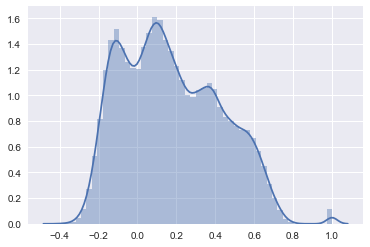

In [4]:
sns.distplot(correlations.values.flat)

But for building a K-nearest neighbors graph, we want the *closest* things (in distance space) to be actually close. So we'll convert our correlation ($\rho$) into a distance ($d$) using this equation:

$$
d = \sqrt{2(1-\rho)}
$$

You can look at the code for `networkplots.correlation_to_distance` to convince yourself that's actually what it's doing:

In [5]:
networkplots.correlation_to_distance??

### Exercise 1

Create a dataframe called `distance` using the `correlation_to_distance` function from `networkplots` on your `corr` dataframe.

In [6]:
# YOUR CODE HERE

![Don't scroll!](figures/dont_scroll.svg)

In [7]:
distances = networkplots.correlation_to_distance(correlations)
distances.head()

,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
r1_TTCCTGCTAGGC,0.000000,0.918162,0.902278,0.915303,0.894357,0.813966,0.935558,0.962057,0.865809,0.862869,...,1.501597,1.573992,1.543429,1.457653,1.463168,1.556343,1.411282,1.410397,1.393785,1.554919
r1_TGGAGATACTCT,0.918162,0.000000,0.888627,0.814301,0.888224,0.775154,0.864082,0.872293,0.792043,0.891061,...,1.475448,1.525941,1.477240,1.422941,1.412374,1.502348,1.334146,1.324370,1.351118,1.517250
r1_CGTCTACATCCG,0.902278,0.888627,0.000000,0.903161,0.906219,0.875346,0.959543,1.039472,0.856018,0.934093,...,1.490314,1.504615,1.504057,1.427930,1.427975,1.486766,1.397166,1.372613,1.323565,1.509198
r1_CAAGCTTGGCGC,0.915303,0.814301,0.903161,0.000000,0.878356,0.710905,0.882551,0.866597,0.812149,0.797162,...,1.451034,1.488795,1.470556,1.439459,1.379516,1.519483,1.277252,1.377088,1.310467,1.520263
r1_ACTCACATAGAG,0.894357,0.888224,0.906219,0.878356,0.000000,0.876488,0.845955,0.942022,0.838919,0.931624,...,1.486181,1.539323,1.507835,1.446209,1.411609,1.538570,1.343948,1.403119,1.388516,1.511771


### Exercise 2

Let's take a look at our values to make sure we have most of our values far away from zero. Use `sns.distplot` to look the flattened values of the `distances` dataframe.

In [8]:
# YOUR CODE HERE

![Don't scroll!](figures/dont_scroll.svg)

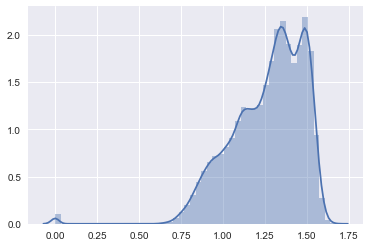

In [9]:
sns.distplot(distances.values.flat)

Now we'll run `phenograph.cluster`, which returns three items:

- `communities`: the cluster labels of each cell
- `sparse_matrix`: a sparse matrix representing the connections between cells in the graph
- `Q`: the modularity score. Higher is better, and the highest is 1. 
    - 0 means your graph is randomly connected and -1 means your graph isn't connected at all.

In [10]:
communities, sparse_matrix, Q = phenograph.cluster(distances, k=10)

Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10953593254089355 seconds
Jaccard graph constructed in 0.05929207801818848 seconds
Wrote graph to binary file in 0.005506038665771484 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.862174
Louvain completed 21 runs in 0.21957707405090332 seconds
PhenoGraph complete in 0.41158509254455566 seconds


Let's take a look at each of these returned values

In [11]:
communities

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 6, 4, 4, 6, 4, 4, 4, 6, 6, 4, 4, 6, 6, 4, 6, 0, 6,
       4, 0, 6, 4, 4, 6, 4, 4, 4, 4, 6, 6, 4, 6, 4, 6, 6, 4, 4, 4, 4, 6, 4,
       4, 4, 0, 4, 6, 4, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1,
       1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 5, 9, 5, 5, 5, 9, 5, 0, 1,
       5, 5, 5, 5, 5, 5, 9, 5, 5, 9, 0, 5, 9, 9, 5, 0, 1, 5, 9, 7, 2, 2, 5,
       5, 9, 9, 5, 5, 5, 5, 5, 9, 7, 5, 9, 9, 5, 5, 9, 2, 8, 2, 2, 2, 2, 2,
       2, 2, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 0, 2, 2, 2, 8, 2, 2, 2, 2,
       8, 2, 2, 2, 2, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 8, 2, 3, 3, 3,
       3, 3, 7, 7, 3, 7, 3, 7, 3, 3, 3, 3, 7, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3,
       7, 3, 7, 3, 3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 7, 7, 7,
       3])

In [12]:
sparse_matrix

<300x300 sparse matrix of type '<class 'numpy.float64'>'
	with 2018 stored elements in COOrdinate format>

In [13]:
Q

0.862174

It looks like the `communities` labels each cell as belonging to a particular cluster, the `sparse_matrix` is some data type that we can't directly investigate, and `Q` is the modularity value.

## Make a graph from the sparse matrix

To be able to lay out our graph in two dimensions, we'll use the `networkx` Python Package to build the graph and lay out the cells and edges.

In [14]:
graph = networkx.from_scipy_sparse_matrix(sparse_matrix)
graph

We'll use the "Spring layout" which is a force-directed layout that pushes cells and edges away from each other. We'll use the built-in networkx function called `spring_layout` on our graph:

In [15]:
positions = networkx.spring_layout(graph)
positions

{0: array([ 0.11858926,  0.18350153]),
 1: array([ 0.03878882,  0.52678488]),
 2: array([ 0.06187783,  0.27057012]),
 3: array([ 0.13133896,  0.82526991]),
 4: array([ 0.02870572,  0.35504813]),
 5: array([ 0.06732686,  0.7275114 ]),
 6: array([ 0.04621855,  0.36044474]),
 7: array([ 0.17361623,  0.14091893]),
 8: array([ 0.04696309,  0.33607266]),
 9: array([ 0.03083784,  0.42507337]),
 10: array([ 0.10086864,  0.78453325]),
 11: array([ 0.03378239,  0.60250719]),
 12: array([ 0.07255188,  0.25743317]),
 13: array([ 0.01940302,  0.50319039]),
 14: array([ 0.01421221,  0.39104004]),
 15: array([ 0.18200872,  0.12691829]),
 16: array([ 0.08915212,  0.77801319]),
 17: array([ 0.08524582,  0.74651175]),
 18: array([ 0.09154744,  0.69092874]),
 19: array([ 0.02699054,  0.34152587]),
 20: array([ 0.54825803,  0.35920535]),
 21: array([ 0.08758751,  0.21952919]),
 22: array([ 0.62387915,  0.65638029]),
 23: array([ 0.14092928,  0.17381448]),
 24: array([ 0.04706814,  0.67507474]),
 25: array

## Convert `positions` dict to dataframe with node information

This `positions` dataframe is a dictionary mapping the node id (in this case, a number) and the $(x, y)$ position. The nodes are in exactly the same order as the rows of the `distances` dataframe we gave `phenograph.cluster`.

In [16]:
networkplots.get_nodes_specs??

Looks like this function can deal with if we already have some clusters defined in our metadata! Let's look at our `cell_metadata` and remind ourselves of which column we might like to use for the `other_cluster_col` value.

In [17]:
cell_metadata.head()

,cluster_id,celltype,cluster_n,cluster_n_celltype,cluster_celltype_with_id
r1_TTCCTGCTAGGC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24)
r1_TGGAGATACTCT,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24)
r1_CGTCTACATCCG,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24)
r1_CAAGCTTGGCGC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24)
r1_ACTCACATAGAG,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24)


In this case, I'd like to use the `cluster_n_celltype` column.

Let's take a look at the code again to see how the `networkplots.get_nodes_specs` function uses the `metadata`:

In [18]:
networkplots.get_nodes_specs??

Looks like  this function uses another one, called `labels_to_colors` -- what does that do?

In [19]:
networkplots.labels_to_colors??

Now let's use `get_nodes_specs` to create a dataframe of information about nodes so we can plot them.

In [26]:
nodes_specs = networkplots.get_nodes_specs(
    positions, cell_metadata, distances.index, 
    communities, other_cluster_col='cluster_n_celltype',
    palette='Set2')
print(nodes_specs.shape)
nodes_specs.head()

(300, 11)


,xs,ys,community,barcode,cluster_id,celltype,cluster_n,cluster_n_celltype,cluster_celltype_with_id,other_cluster_color,community_color
0,0.118589,0.183502,Community #0,r1_TTCCTGCTAGGC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24),#66c2a5,#66c2a5
28,0.020176,0.367893,Community #0,r1_ATGGCTCGCAAA,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24),#66c2a5,#66c2a5
176,0.070618,0.476837,Community #0,r1_CGATGGCTGGAC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24),#66c2a5,#66c2a5
26,0.102607,0.389927,Community #0,r1_GCGTGCTACTAC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24),#66c2a5,#66c2a5
3,0.131339,0.825270,Community #0,r1_GGTAAGGCGCTC,cluster_24,Rods,24,#24 (Rods),Rods (cluster_24),#66c2a5,#66c2a5


## Convert `positions` dict to dataframe with *edge* information

We've now created a dataframe containing the x,y positions, the community labels, and the colors for the communities and other clusters we were interested in. Now we want to do the same for the edges (lines between cells).

Let's take a look at the function we'll use:

In [21]:
networkplots.get_edges_specs??

What arguments does it take? What does it do with them? What does it return?

### Exercise 3

Create a variable called `edges_specs` using the `networkplots.get_edges_specs` and the correct inputs.

In [22]:
# YOUR CODE HERE

![Don't scroll!](figures/dont_scroll.svg)

In [23]:
edges_specs = networkplots.get_edges_specs(graph, positions)
print(edges_specs.shape)
edges_specs.head()

(2018, 3)


,xs,ys,alphas
0,"[0.118589262338, 0.173616226047]","[0.183501529868, 0.140918929513]",0.283333
1,"[0.118589262338, 0.0308378367884]","[0.183501529868, 0.425073372097]",0.191667
2,"[0.118589262338, 0.182008718558]","[0.183501529868, 0.126918292813]",0.229412
3,"[0.118589262338, 0.0269905395037]","[0.183501529868, 0.341525865025]",0.140741
4,"[0.118589262338, 0.202089396812]","[0.183501529868, 0.124308686151]",0.164706


To be able to use the dataframes with the Bokeh plotting language, we need to convert our dataframes into `ColumnDataSource` objects.

In [24]:
nodes_source = ColumnDataSource(nodes_specs)
edges_source = ColumnDataSource(edges_specs)

In [25]:
# --- First tab: KNN clustering --- #
tab1 = networkplots.plot_graph(nodes_source, edges_source, 
                               legend_col='community',
                  color_col='community_color', tab=True,
                  title='KNN Clustering')

# --- Second tab: Clusters from paper --- #
tab2 = networkplots.plot_graph(nodes_source, edges_source,
                  legend_col='cluster_n_celltype', tab=True,
                  color_col='other_cluster_color',
                  title="Clusters from paper")

tabs = Tabs(tabs=[tab1, tab2])
show(tabs)